## Business Applications of Python
### Assignment VIII: Data Analysis and Visualization
Please complete these exercises to the best of your abilities. Please include code to invoke each of your programs to demonstrate the functionality. Write comments throughout your code to explain steps. If you run into a persistent error, please demonstrate your efforts to resolve it; search the web for the error, see if you can get closer to figuring it out. Document what you tried in order to fix the problem.

#### Problem 1:  Importing data and creating a data frame  
#### Use the gapminder data for problems 1-5
a.  Import data from a url: data_url = 'http://bit.ly/2cLzoxH'  

b.  Create a pandas data frame and examine the first few lines of the data set  

c.  Sort the data frame by decreasing life expectancy  

In [2]:
## Import necessary libraries
import pandas as pd

# a.  Import data from
data_url = 'http://bit.ly/2cLzoxH' 


# b.  Create a pandas data frame and examine the first few lines of the data set  
gm= pd.read_csv(data_url)
print(gm.head())  #prints first five lines 

# c.  Sort the data frame by decreasing life expectancy  
gm_lifeExp_sort= gm.sort_values(['lifeExp'], ascending=False)
gm_lifeExp_sort.head()

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


,country,year,pop,continent,lifeExp,gdpPercap
803,Japan,2007,127467972.0,Asia,82.603,31656.06806
671,Hong Kong China,2007,6980412.0,Asia,82.208,39724.97867
802,Japan,2002,127065841.0,Asia,82.000,28604.59190
695,Iceland,2007,301931.0,Europe,81.757,36180.78919
1487,Switzerland,2007,7554661.0,Europe,81.701,37506.41907


#### Problem 2:  Filtering, Summarizing, and Visualizing Distributions
a.  Select data from the year 2002

b.  Find a statistical summary of the data from 2002

c.  Create one histogram for GDP and one for Life Expectancy

d.  Create parallel boxplots to show the distributions of GDP by continent


         year           pop     lifeExp     gdpPercap
count   142.0  1.420000e+02  142.000000    142.000000
mean   2002.0  4.145759e+07   65.694923   9917.848365
std       0.0  1.408483e+08   12.279823  11154.114865
min    2002.0  1.703720e+05   39.193000    241.165877
25%    2002.0  4.173506e+06   55.522250   1409.567264
50%    2002.0  1.037292e+07   70.825500   5319.804524
75%    2002.0  2.654556e+07   75.459250  13359.512257
max    2002.0  1.280400e+09   82.000000  44683.975250


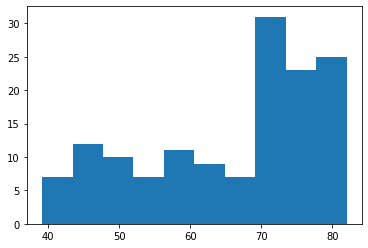

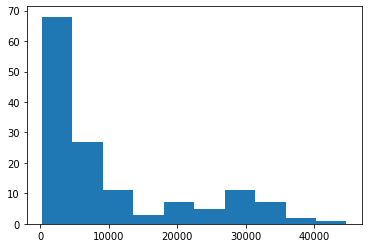

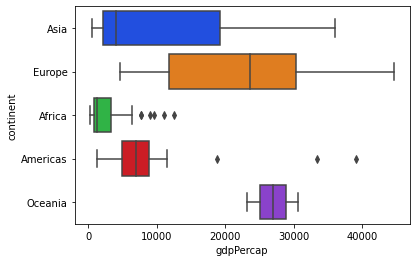

In [14]:
## Import necessary libraries
#gap minder doesn't need to be imported b/c the url was loaded in last block
import math #for stat summary
import seaborn as sns #for boxplot 
import matplotlib.pyplot as plt #for histogram 
%matplotlib inline 
# a.  Select data from the year 2002
gm_02 = gm[gm['year']==2002]

# b.  Find a statistical summary of the data from 2002
print(gm_02.describe())

# c.  Create one histogram for GDP and one for Life Expectancy
lifeExp_hist=plt.hist(gm_02['lifeExp']) #creates histogram for 2002 life expectancy 
plt.show(lifeExp_hist) 


gdp_hist= plt.hist(gm_02['gdpPercap'])
plt.show(gdp_hist)  #displays the histogram

# d.  Create parallel boxplots to show the distributions of GDP within each continent
a= gm_02['gdpPercap']
b= gm_02['continent']

sns.boxplot(a,b, data=gm_02, palette='bright')  

#### Problem 3:  Filtering by Country and Plotting Over Time
a.  Select data for all years, but only for the following countries US, China, England, Brazil, and India. Examine the first few rows of the data frame. 

b.  Create a plot of GDP over time for these five countries (include labels).


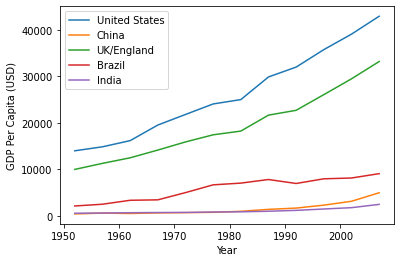

In [13]:
## Import necessary libraries
#import pandas as pd 
#import matplotlib.pyplot as plt 
#%matplotlib inline 
# a.  Select data for all years, but only for the following countries US, China, England, Brazil, and India. Examine the first few rows of the data frame. 
us= gm[gm['country']=='United States']
chn= gm[gm['country']=='China']
eng= gm[gm['country']=='United Kingdom']
br= gm[gm['country']=='Brazil']
ind= gm[gm['country']=='India']
# b.  Create a plot of GDP over time for these five countries (include labels).
plt.plot(us['year'], us['gdpPercap'], label='United States')
plt.plot(chn['year'], chn['gdpPercap'], label='China')
plt.plot(eng['year'], eng['gdpPercap'], label='UK/England')
plt.plot(br['year'], br['gdpPercap'], label='Brazil')
plt.plot(ind['year'], ind['gdpPercap'], label='India')

#create a legend(best indicates the most efficient location with minimial overlap)
#labels already indicated above in plt.plot arguments
plt.legend(loc='best')

#axis labels
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (USD)')
plt.show()

#### Problem 4:   Applying a Function
Use the apply method to determine what percent of countries are below the mean life expectancy.  Customize the output so that it is clear and informative. 

In [24]:
## Import necessary libraries
import numpy as np 
#import pandas as pd

# Code:
avgLifeExp = np.mean(gm_02['lifeExp']) #find the average life expectancy 

#create a function to determine the countries below the average 
def belowAvg(num): 
  if num < avgLifeExp:
    return 1 
  else:
    return 0

#apply the function and check first lines 
lowLifeExp= gm_02['lifeExp'].apply(belowAvg)
# lowLifeExp.head()

#create new column to hold the values returned 
gm_02['BelowAvg']=lowLifeExp
# gm_02['BelowAvg'].head()

#find the percentage of countries below the avg
per= gm_02['BelowAvg'].sum()/gm_02['BelowAvg'].count()
print(round(per, 2) *100, '%')

40.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Problem 5:  Pivot Table
Create a pivot table that summarizes the maximum gdp by year (rows) and continent (columns)


In [25]:
## Import necessary libraries
import pandas as pd 
# Code: 
df= gm[['gdpPercap', 'continent', 'year']]
pd.pivot_table(df, values='gdpPercap', 
               index='year', 
               columns='continent', 
               aggfunc='max')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,4725.295531,13990.48208,108382.35290,14734.23275,10556.57566
1957,5487.104219,14847.12712,113523.13290,17909.48973,12247.39532
1962,6757.030816,16173.14586,95458.11176,20431.09270,13175.67800
1967,18772.751690,19530.36557,80894.88326,22966.14432,14526.12465
1972,21011.497210,21806.03594,109347.86700,27195.11304,16788.62948
1977,21951.211760,24072.63213,59265.47714,26982.29052,18334.19751
1982,17364.275380,25009.55914,33693.17525,28397.71512,19477.00928
1987,11864.408440,29884.35041,28118.42998,31540.97480,21888.88903
1992,13522.157520,32003.93224,34932.91959,33965.66115,23424.76683


#### Problem 6 (Optional Problem)
a. Use a remote data source from datareader to import apple and microsoft stock data for the Month of January of 2019

b.  Generate and interpret statistical summaries of the data

c.  Calculate the percentage of days on which each stock closed higher than it opened. 

d.  Create a plot of the closing prices of apple and microsoft over time for all of January (include labels)

e.  Write a 3-4 sentence summary of your results.  


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Closing Prices in January')

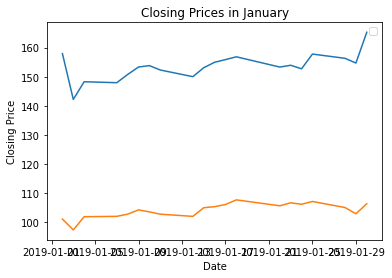

In [50]:
## Import necessary libraries 
from pandas_datareader import data
from datetime import datetime 
import numpy as np
import math 
# a. Use a remote data source from datareader to import apple and microsoft stock data for the Month of January of 2019
symbols= ['AAPL', 'MSFT']
data_source= 'yahoo'
start= datetime(2019, 1, 1)
end= datetime(2019, 1, 30)

df=data.DataReader(symbols,data_source, start, end)
df.head()
# b. Generate and interpret statistical summaries of the data
df.describe()
# c. Calculate the percentage of days on which each stock closed higher than it opened. 
# df['up']=np.where(df['Close']>df['Open'],1,0)

# d. Create a plot of the closing prices of apple and microsoft over time for all of January (include labels)
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices in January')
# e. Write a 3-4 sentence summary of your results.  

